# Analysis of classification of constructive comments

This analysis is done to understand the classification of constructive comments, including the original classification of constructive models, and 2 of our rules-based labels based on features of the comments (number of tokens, verbs, and adjectives) and keywords.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import load_conllu_data, extract_preprocessed_text, extract_original_text

## Data

In [2]:
original_labels = pd.read_table('../input/old_annotations.txt')
feature_based_labels = pd.read_table('../input/new_annotations_features_only.txt')
keyword_based_labels = pd.read_table('../input/new_annotations.txt')


preprocessed_conllu_path = '../input/preprocessed_dataset.conllu'

dataset = load_conllu_data(preprocessed_conllu_path)
dataset_text_original = extract_original_text(preprocessed_conllu_path)
dataset_text = extract_preprocessed_text(preprocessed_conllu_path)

In [5]:
dataset['original_label'] = original_labels
dataset['feature_label'] = feature_based_labels
dataset['keyword_label'] = keyword_based_labels
dataset['text'] = dataset_text_original

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   comment_id        11999 non-null  object 
 1   num_tokens        11999 non-null  int64  
 2   avg_word_length   11999 non-null  float64
 3   num_sentences     11999 non-null  int64  
 4   num_nouns         11999 non-null  int64  
 5   num_verbs         11999 non-null  int64  
 6   num_adjectives    11999 non-null  int64  
 7   num_adverbs       11999 non-null  int64  
 8   num_pronouns      11999 non-null  int64  
 9   num_conjunctions  11999 non-null  int64  
 10  num_determiners   11999 non-null  int64  
 11  original_label    11998 non-null  float64
 12  feature_label     11998 non-null  float64
 13  keyword_label     11998 non-null  float64
 14  text              11999 non-null  object 
dtypes: float64(4), int64(9), object(2)
memory usage: 1.4+ MB


## Analysis

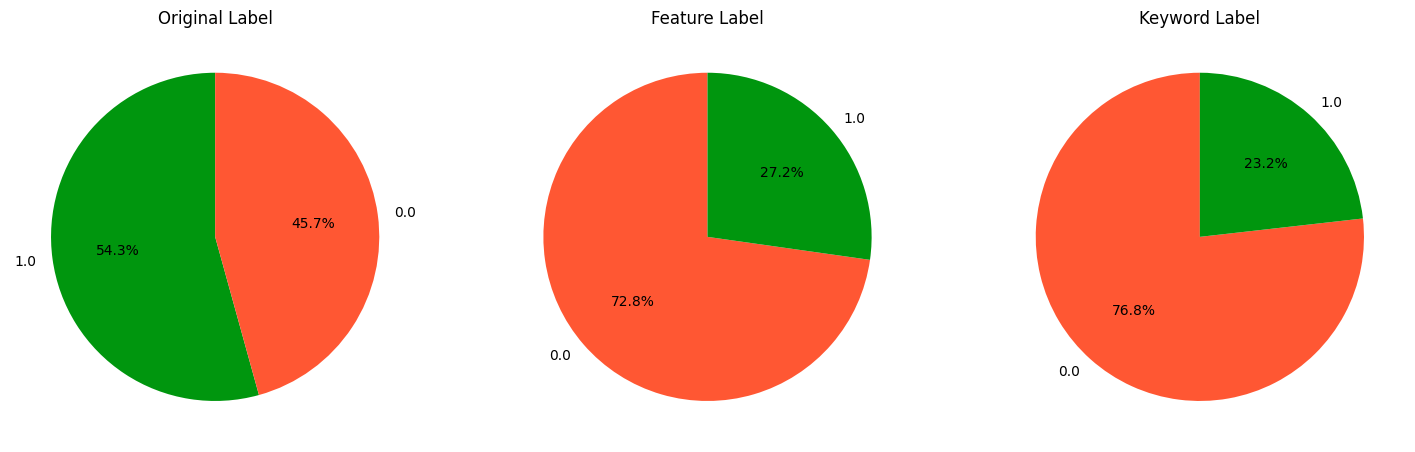

In [4]:
# Count the occurrences of each label
original_label_counts = dataset['original_label'].value_counts()
feature_label_counts = dataset['feature_label'].value_counts()
keyword_label_counts = dataset['keyword_label'].value_counts()

# Define colors
colors = {0.0: '#FF5733', 1.0: '#00960E'}

# Plot pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original Label
axes[0].pie(original_label_counts, labels=original_label_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors[label] for label in original_label_counts.index])
axes[0].set_title('Original Label')

# Feature Label
axes[1].pie(feature_label_counts, labels=feature_label_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors[label] for label in feature_label_counts.index])
axes[1].set_title('Feature Label')

# Keyword Label
axes[2].pie(keyword_label_counts, labels=keyword_label_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors[label] for label in keyword_label_counts.index])
axes[2].set_title('Keyword Label')

plt.show()

Feature Label Coincidence (false: 0, true: 1)
True     8705
False    3294
Name: count, dtype: int64


Keyword Label Coincidence (false: 0, true: 1)
True     8230
False    3769
Name: count, dtype: int64


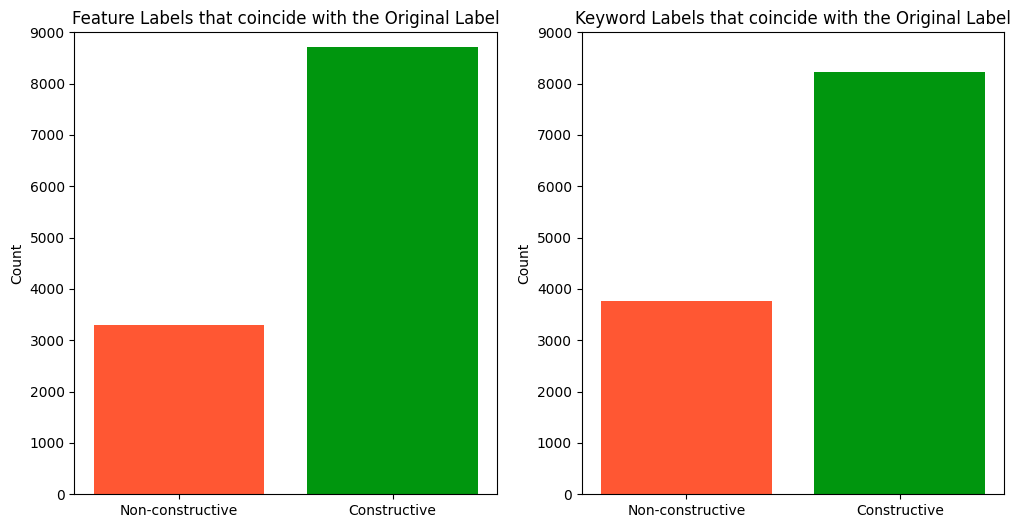

In [57]:
# Plot of the number of feature label that coincide with the original label, and the number of keyword labels that coincide with the original label

# Calculate the number of feature labels that coincide with the original label
feature_coincide_counts = (dataset['original_label'] == dataset['feature_label']).value_counts()

# Calculate the number of keyword labels that coincide with the original label
keyword_coincide_counts = (dataset['original_label'] == dataset['keyword_label']).value_counts()

print('Feature Label Coincidence (false: 0, true: 1)')
print(feature_coincide_counts)
print("\n")
print('Keyword Label Coincidence (false: 0, true: 1)')
print(keyword_coincide_counts)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Feature Label Coincidence
ax[0].bar(feature_coincide_counts.index, feature_coincide_counts.values, color=[colors[label] for label in feature_coincide_counts.index])
ax[0].set_title('Feature Labels that coincide with the Original Label')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Non-constructive', 'Constructive'])
ax[0].set_ylabel('Count')
ax[0].set_ylim(0, 9000)

# Keyword Label Coincidence
ax[1].bar(keyword_coincide_counts.index, keyword_coincide_counts.values, color=[colors[label] for label in keyword_coincide_counts.index])
ax[1].set_title('Keyword Labels that coincide with the Original Label')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Non-constructive', 'Constructive'])
ax[1].set_ylabel('Count')
ax[1].set_ylim(0, 9000)

plt.show()

## All labels with the same results

In [68]:
# Print sample of 5 constructive comments where all labels coincide

sample_size = 5

np.random.seed(42)

constructive_comments = dataset[dataset['original_label'] == 1]
constructive_comments_coincide = constructive_comments[constructive_comments['original_label'] == constructive_comments['feature_label']]
constructive_comments_coincide = constructive_comments_coincide[constructive_comments_coincide['original_label'] == constructive_comments_coincide['keyword_label']]
print('Sample of Constructive Comments where all labels coincide:')
print('Original Label: Constructive')
print('Feature Label: Constructive')
print('Keyword Label: Constructive')

for i, row in constructive_comments_coincide.sample(sample_size).iterrows():
    print(row['text'])
    print()

Sample of Constructive Comments where all labels coincide:
Original Label: Constructive
Feature Label: Constructive
Keyword Label: Constructive
“I believe, and I think most Canadians believe, that it is offensive that someone would hide their identity at the very moment when they are committing to join the Canadian family,” Mr. Harper said. What Harper and most Canadians believe is utterly irrelevant to this decision. The decision is based on the supreme Canadian law - the Charter of Rights and Freedoms. The Charter protects the rights of all Canadians - those rights are not granted by majority vote. Is that so hard to understand?

It is heartening to read the intelligent posts where the posters have refrained from pitting one country against another especially since Canada and India have longstanding bilateral ties, built upon shared values of democracy and pluralism. There are a number of canadians living and working in India too and never heard of anyone making a hue and cry about t

**Sample of Constructive Comments where all labels coincide:**

- Original Label: Constructive
- Feature Label: Constructive
- Keyword Label: Constructive

1. “I believe, and I think most Canadians believe, that it is offensive that someone would hide their identity at the very moment when they are committing to join the Canadian family,” Mr. Harper said. What Harper and most Canadians believe is utterly irrelevant to this decision. The decision is based on the supreme Canadian law - the Charter of Rights and Freedoms. The Charter protects the rights of all Canadians - those rights are not granted by majority vote. Is that so hard to understand?

2. It is heartening to read the intelligent posts where the posters have refrained from pitting one country against another especially since Canada and India have longstanding bilateral ties, built upon shared values of democracy and pluralism. There are a number of canadians living and working in India too and never heard of anyone making a hue and cry about their presence. In fact there are around 250 small and big Canadian companies operating in India and this is of benefit to not only them but could overall boost Canada's economy by at least $6 billion. That translates to almost 40,000 new jobs across Canada, or a $500 boost to the average Canadian family's annual income. It is for each country to decide its foreign policy and only the ignorant or prejudiced would blame another for it. Read more: www. vancouversun.com/business/India+open+business+Canada+ready/8073917/story.html#ixzz2Qd0lZZ9dwww.canadainternational.gc.ca/india-inde/bilateral_relations_bilaterales/canada_india-inde.aspxwww.vancouversun.com/business/India+open+business+Canada+ready/8073917/story.html

3. I truly hope Margaret Wente never retires. She, like Rosie DiManno of the Star, is among the few that have the courage to write openly and clearly against the asinine politically correct nonsense that is now stupidly called a 'discussion'. (Doug Saunders, take note.) Wente is right. The sleazeballs of BLM are nothing but bullies. Anyone who continues to grovel to them are nothing but dehumanized wimps.

4. I get the feeling that the people running the NDP campaign this federal election are the same fools who ran the NDP campaign in BC. There, the BC Liberals under Christy Clark were on the ropes. They were tired and there were corruption scandals by the day. The public wanted change and were ready to vote in an NDP majority government. But the NDP had their leader (Dix) tone himself down, stop attacking the governing party that had been there for a long time and act like he was the Premier. During the debates, the NDP Leader (Dix) failed to remind any of the viewers or put the Premier on the spot regarding any of the numerous scandals/lies/etc. etc. He didn't make the Premier accountable at all - just like Mulcair has not gone after Harper for his lies and dishonesty and destruction of our institutions. So what happened? The NDP had a horrible night and the governing liberals stayed in power. It looks like the story is being repeated and Harper will get away again.

5. This piece and most of the comments on the this board simply show how easy it is to Vilify a Race and Dehumanize them. Native people are suffering in our country and no one wants to talk. Everyone in Grade 9 history class should study this piece to see how perfectly rational people can be lead to believe outright lies about a race... how we can turn our backs on the process ,wipe our hands clean and allow our servants to commit genocide in our North. Out of sight out of mind. After all ....'they' deserved it! Progressives wanted to raise our taxes for them but 'They were ruining our Homeland'. Now I can have two large screen TV's and an I-phone.

In [59]:
# Print sample of 5 non-constructive comments where all labels coincide

sample_size = 5

np.random.seed(42)

non_constructive_comments = dataset[dataset['original_label'] == 0]
non_constructive_comments_coincide = non_constructive_comments[non_constructive_comments['original_label'] == non_constructive_comments['feature_label']]
non_constructive_comments_coincide = non_constructive_comments_coincide[non_constructive_comments_coincide['original_label'] == non_constructive_comments_coincide['keyword_label']]
print('Sample of Non-Constructive Comments where all labels coincide:')
print('Original Label: Non-Constructive')
print('Feature Label: Non-Constructive')
print('Keyword Label: Non-Constructive')

for i, row in non_constructive_comments_coincide.sample(sample_size).iterrows():
    print(row['text'])
    print()

Sample of Non-Constructive Comments where all labels coincide:
Original Label: Non-Constructive
Feature Label: Non-Constructive
Keyword Label: Non-Constructive
Very well said, Mr. Chretien; and thank you for keeping us out of Iraq

I like to imagine the late, great Barbara Frum interviewing her daughter on this topic. She'd make mincemeat out of her.

Trump does not have what it takes to be a world leader. He can't manage his mouth let alone a country.

The Conservative G&M should be renamed the Sun Globe.

Another public sector occupation that requires no education making 100k/yr... No wonder Ontario is broke. I guess 100k/yr is the norm in the parasitic public sector. I 100% respect what they do but 100k/yr... get real. We need to put an end to this garbage now before we are Greece.



**Sample of Non-Constructive Comments where all labels coincide:**

- Original Label: Non-Constructive
- Feature Label: Non-Constructive
- Keyword Label: Non-Constructive

1. Very well said, Mr. Chretien; and thank you for keeping us out of Iraq

2. I like to imagine the late, great Barbara Frum interviewing her daughter on this topic. She'd make mincemeat out of her.

3. Trump does not have what it takes to be a world leader. He can't manage his mouth let alone a country.

4. The Conservative G&M should be renamed the Sun Globe.

5. Another public sector occupation that requires no education making 100k/yr... No wonder Ontario is broke. I guess 100k/yr is the norm in the parasitic public sector. I 100% respect what they do but 100k/yr... get real. We need to put an end to this garbage now before we are Greece.


## Original labels vs Feature based labels

In [60]:
# Print sample of 5 constructive comments where original labels and feature labels coincide

sample_size = 5

np.random.seed(42)

constructive_comments = dataset[dataset['original_label'] == 1]
constructive_comments_coincide = constructive_comments[constructive_comments['original_label'] == constructive_comments['feature_label']]
print('Sample of Constructive Comments where original and feature based labels coincide:')
print('Original Label: Constructive')
print('Feature Label: Constructive')

for i, row in constructive_comments_coincide.sample(sample_size).iterrows():
    print(row['text'])
    print()

Sample of Constructive Comments where original and feature based labels coincide:
Original Label: Constructive
Feature Label: Constructive
Living in Toronto as a single person and working as a contractor with a pitiful amount $40000 annual wage. Hardly to make ends meet. But government still takes more than $6000 for tax! For the rest of leftover, I still has to pay tax (sale tax @13%) on a daily basis. Is this a best country to live???

Re: 'If rage and entitlement isn’t your definition of manhood....'Spoken as if a true ideological feminist who suffers from the apex fallacy: 'The apex fallacy is the idea that we use the most visible members of a group to make generalizations about the entire group; i.e., we see prominent men at the top of the pyramid and think all men are doing well, when in fact there are a great many at the bottom of the pyramid, too.' -Alison Beard, a senior editor at Harvard Business ReviewI write about sexists like Balkissoon in:'For Feminist Writers: Distinguis

**Sample of Constructive Comments where original and feature based labels coincide:**

- Original Label: Constructive
- Feature Label: Constructive

1. Living in Toronto as a single person and working as a contractor with a pitiful amount $40000 annual wage. Hardly to make ends meet. But government still takes more than $6000 for tax! For the rest of leftover, I still has to pay tax (sale tax @13%) on a daily basis. Is this a best country to live???

2. Re: 'If rage and entitlement isn’t your definition of manhood....'Spoken as if a true ideological feminist who suffers from the apex fallacy: 'The apex fallacy is the idea that we use the most visible members of a group to make generalizations about the entire group; i.e., we see prominent men at the top of the pyramid and think all men are doing well, when in fact there are a great many at the bottom of the pyramid, too.' -Alison Beard, a senior editor at Harvard Business ReviewI write about sexists like Balkissoon in:'For Feminist Writers: Distinguish Between Feminism and Feminists!' http://malemattersusa.wordpress.com/2010/09/14/for-feminist-writers-distinguish-between-feminism-and-feminists/

3. Wente has ably pointed to the destructive road that progressives like Trudeau are taking Canada down. IMO, cornerstones of our society such as equality and fairness are being eroded by PC zealots who mistakenly equate unhappiness with injustice. 'No platforming' on our university campuses, identity and victim politics, benevolent racism and gender discrimination are but a few nasty results. Kellie Leitch was on the right track - a 'will adjust to suit' immigration policy is a disastrous folly but she presented her case backwards. We don't need to vet immigrants for their social suitability. We need to go back to our basic principles, maintain them and make it loud and clear toall potential newcomers about what it means to live in Canada. We are a secular society. Gender equality is the rule in our public services such as education. We have a one size fits all justice system. And yes we know, ugly holes can and do appear - the work is never done but overall it has worked well. Some potential immigrants will find these principles acceptable and embrace them, some will not and will decide that Canada is not the place for them - you can't please everybody.

4. Exceptionally rational and well-reasoned piece, Ms. Wente. In the face of hysteria and a lynch-mob mentality, you were courageous to write such an article. Perhaps it is not inevitable that we will all slide into a 'Brave New World', where no one dare have an independent thought, much less one at odds with the brainwashed, politically-correct-obsessed, and wretched, masses.

5. All failures are simply the result of choosing the wrong objective . All conflicts are failures. The truth is the only thing we all share in peace. Corruption is defined by denying it. We fail to share it when we describe our conflicts ambiguously. Describe any conflict with an unbiguous question and we will all share the truthful answer.


In [69]:
# Print sample of 5 non-constructive comments where original labels and feature labels coincide

sample_size = 5

np.random.seed(42)

non_constructive_comments = dataset[dataset['original_label'] == 0]
non_constructive_comments_coincide = non_constructive_comments[non_constructive_comments['original_label'] == non_constructive_comments['feature_label']]
print('Sample of Constructive Comments where original and feature based labels coincide:')

for i, row in non_constructive_comments_coincide.sample(sample_size).iterrows():
    print(row['text'])
    print()

Sample of Constructive Comments where original and feature based labels coincide:
Very well said, Mr. Chretien; and thank you for keeping us out of Iraq

I like to imagine the late, great Barbara Frum interviewing her daughter on this topic. She'd make mincemeat out of her.

Trump does not have what it takes to be a world leader. He can't manage his mouth let alone a country.

The Conservative G&M should be renamed the Sun Globe.

Another public sector occupation that requires no education making 100k/yr... No wonder Ontario is broke. I guess 100k/yr is the norm in the parasitic public sector. I 100% respect what they do but 100k/yr... get real. We need to put an end to this garbage now before we are Greece.



**Sample of Constructive Comments where original and feature based labels coincide:**

- Original Label: Non-Constructive
- Feature Label: Non-Constructive

1. Very well said, Mr. Chretien; and thank you for keeping us out of Iraq

2. I like to imagine the late, great Barbara Frum interviewing her daughter on this topic. She'd make mincemeat out of her.

3. Trump does not have what it takes to be a world leader. He can't manage his mouth let alone a country.

4. The Conservative G&M should be renamed the Sun Globe.

5. Another public sector occupation that requires no education making 100k/yr... No wonder Ontario is broke. I guess 100k/yr is the norm in the parasitic public sector. I 100% respect what they do but 100k/yr... get real. We need to put an end to this garbage now before we are Greece.


In [62]:
# Print sample of 5 constructive comments where original labels and feature labels DO NOT coincide

sample_size = 5

np.random.seed(42)

constructive_comments = dataset[dataset['original_label'] == 1]
constructive_comments_coincide = constructive_comments[constructive_comments['original_label'] != constructive_comments['feature_label']]
print('Sample of Constructive Comments where original and feature based labels DO NOT coincide:')

for i, row in constructive_comments_coincide.sample(sample_size).iterrows():
    print(row['text'])
    print()

Sample of Constructive Comments where original and feature based labels DO NOT coincide:
How absurd the claim that the Libs are 'intentionally courting controversy' regarding the Syrian refugee crisis. Trudeau made an election promise. Upon election, he asked his bureaucrats if it was feasible. Apparently it is.

Preston's first agenda item is: 'Greater recognition of the character traits that Canadians want to see in their elected officials – openness, honesty, transparency, integrity, compassion, humility – and making the possession of such traits a much more important factor in recruiting candidates, leaders and staff. 'And Preston, when that last lot of Conservatives were in power, many Canadians weren't just hoping for 'greater recognition' of those traits - they were looking for ANY recognition at all. While you're at it, if you really do believe what you just wrote, you should be calling for real consequences for elected officials who do not live up to those standards. As it is,

**Sample of Constructive Comments where original and feature based labels DO NOT coincide:**

- Original Label: Constructive
- Feature Label: Non-Constructive

1. How absurd the claim that the Libs are 'intentionally courting controversy' regarding the Syrian refugee crisis. Trudeau made an election promise. Upon election, he asked his bureaucrats if it was feasible. Apparently it is.

2. Preston's first agenda item is: 'Greater recognition of the character traits that Canadians want to see in their elected officials – openness, honesty, transparency, integrity, compassion, humility – and making the possession of such traits a much more important factor in recruiting candidates, leaders and staff. 'And Preston, when that last lot of Conservatives were in power, many Canadians weren't just hoping for 'greater recognition' of those traits - they were looking for ANY recognition at all. While you're at it, if you really do believe what you just wrote, you should be calling for real consequences for elected officials who do not live up to those standards. As it is, it appears very much that those involved in the bribing of a senator, the tampering with an audit, and the cover-up of all of it will likely walk with nothing more than a slap on the wrist.

3. Totally unfair article. These treaty's were made 100+yrs ago. The land that these guys were given for 'reserves' was what was wanted or needed or forced upon them in a different era of time. NOW, you're solution is relocation and integration for isolated reserves? Isn't THAT a whole lot more convenient then sitting down WITH individual bands and working TOGETHER to find a solution? Oh my, that might take a lot more time and money - but relationships might be saved too (which is far more important). Let's partner with our FN's and work together to achieve a goal that both sides can work with. You are dead wrong about 'the crown' concept too. Many FN's made no such deal with 'the gov't of Canada'. They made their deal with 'the Crown'. It's only now that this 'crown' means the gov't of Canada. In my opinion, when Canada took over FN's responsibility, entirely new treaties should have been made - OR, if Canada agreed to honour all the treaties that 'the Crown' made (which it did), then Canada is stuck honouring the spirit of the treaty's as well (which it historically, has not). There are way too many people in Canada that still view this as 'the native problem'. Listen, we made a deal. We, by FAR, got the better end of the deal. Now, because of problems that were not forseen 100+yrs ago (and largely our fault due to horrible policies of assimilation) we have to deal with the fall out. So...deal with it! I hate all the red-tape involved in doing my taxes every year, but I still do it - because there are consequences if I don't. AND, I'm a good citizen of Canada, so I choose to put up with the hassle, and pay my taxes. It's time that we, as citizens of Canada, 'put up with the hassle', and continue to 'deal with it'. And yes, that is largely going to happen with discussions between Canada (through the Prime Minister), and FN's (through the AFN). A discussion from one nation to another. Finally, morally speaking, there should be some type of law in place that bans any Federal Gov't from messing with the Indian Act without agreement and/or consultation from all FN's involved (probably through the AFN). If there are serious, long-term disagreements, binding arbitration should be involved (in my opinion). This arbiter would have to be agreed upon by both parties ahead of time. I know the Indian Act is a gov't piece of legislation, but morally speaking, it shouldn't be. It directly affects the lives of FN's people, so FN's people should have a place at the table. In fact, they should have half the table!

4. One of the better phrases to describe the Liberals (apart from those we can't repeat in a family newspaper) is 'there's no space between the Liberals and the Conservatives'. Like the ignominious Michael Ignatieff before him, Trudeau cannot seem to find an issue that sets the Liberals apart from Harper's government. They are in a veritable silent coalition to keep the NDP down and out, the majority of Canadians struggling and submissive to wage slavery.

5. Did Chretien sound the death knell for the Liberal Party when he passed paradigm changing NAFTA despite his electoral promise to kill the deal sans substantive changes and proceeded to decimate federal social transfers to provinces and ultimately citizens? Can Liberals claim to be a national party of the people?


In [63]:
# Print sample of 5 non-constructive comments where original labels and feature labels DO NOT coincide

sample_size = 5

np.random.seed(42)

constructive_comments = dataset[dataset['original_label'] == 0]
constructive_comments_coincide = constructive_comments[constructive_comments['original_label'] != constructive_comments['feature_label']]
print('Sample of Non-Constructive Comments where original and feature based labels DO NOT coincide:')
print('Original Label: Non-Constructive')
print('Feature Label: Constructive')

for i, row in constructive_comments_coincide.sample(sample_size).iterrows():
    print(row['text'])
    print()

Sample of Non-Constructive Comments where original and feature based labels DO NOT coincide:
Original Label: Non-Constructive
Feature Label: Constructive
Surely there is some means of removing a leader from office who continues to display physical and mental instability. It's time Torontonians demanded this before all those wonderful tourists who provide all those wonderful hospitality-industry jobs start staying away from such a 'dumb' city.

Talking with my Friends in and from Sweden... yes, the problems the country are presently experiencing are from the flood of immigrants. And yes, a lot of Swedes (as my from friends opinions) are not too openly racist but are.

And not a word here about Trudeau having his own personal photographer following him around EVERYWHERE, almost 24/7. Anything to retain power, right? - to say nothing of the expense and obscene vanity. Explain that one away reasonably.

Any book that asks Canadians to freeze in the dark for the sake of people in Africa is 

**Sample of Non-Constructive Comments where original and feature based labels DO NOT coincide:**

- Original Label: Non-Constructive
- Feature Label: Constructive

1. Surely there is some means of removing a leader from office who continues to display physical and mental instability. It's time Torontonians demanded this before all those wonderful tourists who provide all those wonderful hospitality-industry jobs start staying away from such a 'dumb' city.

2. Talking with my Friends in and from Sweden... yes, the problems the country are presently experiencing are from the flood of immigrants. And yes, a lot of Swedes (as my from friends opinions) are not too openly racist but are.

3. And not a word here about Trudeau having his own personal photographer following him around EVERYWHERE, almost 24/7. Anything to retain power, right? - to say nothing of the expense and obscene vanity. Explain that one away reasonably.

4. Any book that asks Canadians to freeze in the dark for the sake of people in Africa is not going to convince me to do a thing. The whole con is an effort to take money from those who have it and give it to those who haven't earned it.

5. I think Coyne in the NP was on the money (http://news.nationalpost.com/news/canada/canadian-politics/andrew-coyne-first-fix-for-the-conservatives-their-psyche). Coyne describes the current Conservative party as a party with nothing to offer populated by people who lack the courage to acknowledge and address that fact; and, starting from there — rather than doing the work to develop meaningful policy for the 21st century — their inclination is to dissemble, bully and browbeat rather than acknowledge their intellectual poverty and pusillanimity. And yes I mean you Boessenkool, Speer, Ibbitson, Bricker and Manning: a chorus of farty, harrumphing dudes with nothing to say but 'tax cuts,' 'tax cuts,' 'tax cuts…'


## Feature labels vs Keyword based labels

In [64]:
# Print sample of 5 constructive comments where feature labels and keyword labels coincide

sample_size = 5

np.random.seed(123)

constructive_comments = dataset[dataset['feature_label'] == 1]
constructive_comments_coincide = constructive_comments[constructive_comments['feature_label'] == constructive_comments['keyword_label']]
print('Sample of Constructive Comments where original and keyword based labels coincide:')
print('Feature Label: Constructive')
print('Keyword Label: Constructive')

for i, row in constructive_comments_coincide.sample(sample_size).iterrows():
    print(row['text'])
    print()

Sample of Constructive Comments where original and keyword based labels coincide:
Feature Label: Constructive
Keyword Label: Constructive
The 'Leapers' formerly known as the NDP are, in a way a good development in Canadian politics. Those drawn to their ranks will be clearly identified as part of a sect that is intent on sacrificing Canada's economy, in the name of one dogmatic and ideologic response to climate change combined with a hatred of free enterprise, Israel and trade. They are the very opposite of what Canada needs in a increasingly competitive world. An organization that will seek to divide the nation just when it needs most to be united.

Excellent article. An insightful warning to be heeded. Identities poikitics is folly and the Federal Government, the Ontario Government, and the SJW are setting Canada up for a backlash.

I find it interesting and telling that card carrying Liberals such as Ms Khan equate standing up for women's rights and being against terrorism as being 

**Sample of Constructive Comments where original and keyword based labels coincide:**

- Feature Label: Constructive
- Keyword Label: Constructive

1. The 'Leapers' formerly known as the NDP are, in a way a good development in Canadian politics. Those drawn to their ranks will be clearly identified as part of a sect that is intent on sacrificing Canada's economy, in the name of one dogmatic and ideologic response to climate change combined with a hatred of free enterprise, Israel and trade. They are the very opposite of what Canada needs in a increasingly competitive world. An organization that will seek to divide the nation just when it needs most to be united.

2. Excellent article. An insightful warning to be heeded. Identities poikitics is folly and the Federal Government, the Ontario Government, and the SJW are setting Canada up for a backlash.

3. I find it interesting and telling that card carrying Liberals such as Ms Khan equate standing up for women's rights and being against terrorism as being anti-Muslim. Of course by doing so does what she accuses the Tories of doing - she perpetuates the silly myth that all Muslims are abusers of women's rights and/or terrorists. She even holds up Omar Khadr as a poster boy of a Muslim that has been wronged. She should tell that to the wife of the US Army medic he has plead guilty to murdering. She also equates the govt policy of accepting the most vulnerable and at risk immigrants ahead of those less so as anti-Muslim. Of course the govt sees this as people from a region, not a religion. For instance that is why they took in 23,000 Iraqis, mostly Muslim and 1300 Syrians, mostly Muslim in the past year. At the time those in the most danger from fighting were in Iraq, not Syria. But hey the left doesn't want the facts to leak out and ruin a good propaganda campaign. Clearly she feels that playing politics with this issue trumps all else. Also the left accuses the Tories of keeping this story going but it is only the left talking and writing about it, including the left wing media.

4. Indians in the Idle No More movement say the Canadian federal government (the big Crown) should respect First Nations sovereignty and abide by the treaties the Crown has with Indians. The British Crown made many different treaties with various groups of Indian bands and in the treaties the Indians agreed to become subjects of the Crown and obey the laws of the Crown so they can't claim sovereignty. Furthermore, the Crown didn't promise in any treaty with Indians to provide, pay for and maintain infrastructure like roads, bridges, houses, treatment plants, old age homes, Indian healing centres, community centres, bingo halls, playgrounds, hockey rinks, band offices and equipment, etc. or to pay for services like policing or fire protection or to pay for social programs for Indians on Indian reserves. Nevertheless, the Canadian federal government (the big Crown) now sends about $11 billion from taxpayers each year to pay for and maintain infrastructure like roads, bridges, houses, treatment plants, old age homes, Indian healing centres, community centres, bingo halls, playgrounds, hockey rinks, band offices and equipment, etc. and to pay for services like policing and fire protection and to pay for social programs on reserves the Crown did not promise in treaties for Indians on reserves. In addition, the provincial governments (the little Crowns) are providing millions of dollars from taxpayers each year to pay for projects on Indian reserves even though Section 91 part 24 of the Canadian Constitution says the Canadian government is responsible for 'Indians, and Lands reserved for the Indians'. And mining and other companies that are setting up on Crown land outside of Indian reserves are now also sending millions of dollars to Indian reserves even though those companies pay taxes to the Crown and it sends some of that tax money from those companies to Indian reserves. With all of that money, the Crown is sharing with Indians and is providing far more money than is required according to treaties to pay for infrastructure, services and social programs for Indians the Crown did not even promise in treaties for Indians on reserves. But do we hear a thank you? No, we only hear demands for more. Maybe, when PM Harper meets with Indian chiefs in Ottawa on January 11, 2103, he should tell the chiefs the Harper government will abide strictly by treaties; will stop paying more that is required in the treaties and will stop paying for infrastructure, services and social programs the Crown did not promise in treaties for Indians on Indian reserves. If the Indians want the Crown to live up to the treaties, maybe the Crown should live up to the treaties.

5. I don't understand. So, BLM is claiming the gay pride is mainstream because over 35 years of conflict and reconciliation the lgbt community has made amends with the police that once oppressed them. And this means lgbt are somehow sell outs because they have achieved acceptance from society in general. This is a problem, right?


In [65]:
# Print sample of 5 non-constructive comments where feature labels and keyword labels coincide

sample_size = 5

np.random.seed(123)

constructive_comments = dataset[dataset['feature_label'] == 0]
constructive_comments_coincide = constructive_comments[constructive_comments['feature_label'] == constructive_comments['keyword_label']]
print('Sample of Non-Constructive Comments where original and keyword based labels coincide:')
print('Feature Label: Non-Constructive')
print('Keyword Label: Non-Constructive')

for i, row in constructive_comments_coincide.sample(sample_size).iterrows():
    print(row['text'])
    print()

Sample of Non-Constructive Comments where original and keyword based labels coincide:
Feature Label: Non-Constructive
Keyword Label: Non-Constructive
This article is drivel. These single males who are swarming Europe are economic migrants, not refugees. Many are not even from the war zone. Those who are, one would expect that these fit young men would stay in Syria and Iraq and fight for their countries. Is this a parade of cowards?

The question to those expats who are asking for the right to vote. Do you pay Canadian income taxes? If not, allowing you to vote -- would give you all the rights without any of the responsibilities.

I guess this struck a nerve, 3 posts in a row, but I recently visited Niagra Falls and the actual majority of visitors were of Indian (Asian)descent. This was not an issue and I have many Indian friends. What did bother me that a large group had set up a loudspeaker system and were broadcasting at ball park volume in a language I didn't understand to a point 

**Sample of Non-Constructive Comments where original and keyword based labels coincide:**

- Feature Label: Non-Constructive
- Keyword Label: Non-Constructive

1. This article is drivel. These single males who are swarming Europe are economic migrants, not refugees. Many are not even from the war zone. Those who are, one would expect that these fit young men would stay in Syria and Iraq and fight for their countries. Is this a parade of cowards?

2. The question to those expats who are asking for the right to vote. Do you pay Canadian income taxes? If not, allowing you to vote -- would give you all the rights without any of the responsibilities.

3. I guess this struck a nerve, 3 posts in a row, but I recently visited Niagra Falls and the actual majority of visitors were of Indian (Asian)descent. This was not an issue and I have many Indian friends. What did bother me that a large group had set up a loudspeaker system and were broadcasting at ball park volume in a language I didn't understand to a point where I literally could not longer hear the falls. Perhaps this is the fault of parks Canada to allow such a setup, but I would also argue that cultural insensitivity is not limited to any one group.

4. Nope. The rich and the crooked will feel the pinch more. But overall, Britain has the resilience. There are plenty of countries outside EU.

5. More shrill panick from the Globe. Relax, the USA is broken, and it happened under Obama. Now it seems the democrats are nothing but sour grapes making unfounded accusations about the Russians etc. Poor losers as the Globe is. Give Trump a chance and quit the panic.


In [66]:
# Print sample of 5 constructive comments where feature labels and keyword labels DO NOT coincide

sample_size = 5

np.random.seed(123)

constructive_comments = dataset[dataset['feature_label'] == 1]
constructive_comments_coincide = constructive_comments[constructive_comments['feature_label'] != constructive_comments['keyword_label']]
print('Sample of Constructive Comments where original and keyword based labels DO NOT coincide:')
print('Feature Label: Constructive')
print('Keyword Label: Non-Constructive')

for i, row in constructive_comments_coincide.sample(sample_size).iterrows():
    print(row['text'])
    print()

Sample of Constructive Comments where original and keyword based labels DO NOT coincide:
Feature Label: Constructive
Keyword Label: Non-Constructive
Can we all at least agree that Horwath has been terrible? As much as I fear a Hudak government, I do give him kudos for running on policy (scary policy). He has a plan that he wants to execute, and that he fully believes will work. Whereas every second word out of Horwath's mouth is 'gas' or 'plant'. Don't tell me why the other person doesn't deserve the job, tell me why you do. I've yet to hear anything very convincing about her plans - I don't like a 1% increase to corporate taxes any more than I like a 3.5% decrease (although I would've easily accepted a 1-1.5% decrease).

Funny to go back and read this after the election, which Orwin failed so disastrously to forecast. Like a lot of people who write well, he is so much in love with his own writing he would rather write a stinging phrase than make sure it reflected the truth. It was wri

**Sample of Constructive Comments where original and keyword based labels DO NOT coincide:**

- Feature Label: Constructive
- Keyword Label: Non-Constructive

1. Can we all at least agree that Horwath has been terrible? As much as I fear a Hudak government, I do give him kudos for running on policy (scary policy). He has a plan that he wants to execute, and that he fully believes will work. Whereas every second word out of Horwath's mouth is 'gas' or 'plant'. Don't tell me why the other person doesn't deserve the job, tell me why you do. I've yet to hear anything very convincing about her plans - I don't like a 1% increase to corporate taxes any more than I like a 3.5% decrease (although I would've easily accepted a 1-1.5% decrease).

2. Funny to go back and read this after the election, which Orwin failed so disastrously to forecast. Like a lot of people who write well, he is so much in love with his own writing he would rather write a stinging phrase than make sure it reflected the truth. It was written days after the debate in St. Louis, where Trump spotlighted Kathy Shelton, Paula Jones and Juanita Broaddrick. Kathy Shelton was the accuser in a 1975 rape trial where lawyer Hillary Clinton represented the defendant. So it is bizarre for him to say that he was negligent in attacking Clinton because the Donald's campaign had to be all about himself. Does Orwin miss Hillary Clinton, the former ****-Shamer-in-Chief?

3. The best column recently from the NYTimes called 'The closing of the Canadian mind' by Stephen Marche, http://www.nytimes.com/2015/08/16/opinion/sunday/the-closing-of-the-canadian-mind.htmlhas received a tremendous amount of attention and is being widely shared on the internet and has caused a reaction that many Canadians have been waiting for regarding the govt of Stephen Harper.. that is, one of outrage. Here is snippet on one journalists Jeff Sallot take on that column.. 'Marche clobbered Harper in a way that none of the opposition leaders came close to doing in the first televised debate on Aug. 6. In that match-up, the NDP’s Tom Mulcair and Liberal Leader Justin Trudeau were too worried about avoiding ‘mistakes’ to do a proper job of making Harper defend his record. Marche does a far more vigorous job of it. He notes Harper’s “peculiar hatred for sharing information,” his outright hostility to journalists, his war against environmental science, the gag orders imposed on government research scientists, his “active promotion of ignorance” with the scrapping of the long-form census, the criminal efforts of party operatives to suppress the anti-Conservative vote, the Senate corruption scandals, and on and on. “The Harper years have seen a subtle darkening of Canadian life,” Marche wrote. He accused Harper of “know-nothing conservatism.” And he concluded that, whether Harper wins or loses, “he will leave Canada more ignorant than he found it.” http://ipolitics.ca/2015/08/19/the-harper-article-that-taught-us-to-get-angry-again/

4. I don't think that this problem of 40 % of the vote is exclusively a problem for the Conservative party. What % would the Liberals get? Could the NDP ever get 40 %. This is a problem when you have more than 2 parties and the vote is always split to this degree. Even in America with only 2 parties, a winnner gets 50.3% of the vote. Hardly conclusive.

5. I am ashamed to have read this. I was hoping for a thoughtful position piece on an escalating conflict that could very well engulf us. Instead I read pure government propaganda - the same kind of garbage that Russians are reading because their 'newspapers' are printing it. 'Charred remnants', 'strewn across fields', the list of loaded language meant to insight feelings of outrage goes on. Stating that Canada will not stand idly by as Russia threatens all of Europe is intentionally trying to stir up a pro-war feeling among the population. The reality is that Canada will wait for the US before doing anything. We are incapable of being caped crusaders. Canada will not promote a hot-war. The population does not have the stomach for a war between major nuclear powers. Putin is bad news, but this piece is simply irresponsible. For shame Globe and Mail. For shame for sinking to this level.


In [74]:
# Print sample of 4 Non-constructive comments where feature labels and keyword labels DO NOT coincide
# There are only 4 comments of this class


sample_size = 4

np.random.seed(123)

constructive_comments = dataset[dataset['feature_label'] == 0]
constructive_comments_coincide = constructive_comments[constructive_comments['feature_label'] != constructive_comments['keyword_label']]

constructive_comments_coincide
print('Sample of Non-Constructive Comments where original and keyword based labels DO NOT coincide:')
print('Feature Label: Non-Constructive')
print('Keyword Label: Constructive')

for i, row in constructive_comments_coincide.sample(sample_size).iterrows():
    print(row['text'])
    print()

Sample of Non-Constructive Comments where original and keyword based labels DO NOT coincide:
Feature Label: Non-Constructive
Keyword Label: Constructive
The results of this vote are another indication of the disconnect between the people that live every day middle class lives and the politicians that live in a cocoon of belief that has nothing to do with reality. That problem obviously exists in the US or a fellow like Donald Trump would not be where he is today. I believe it also exits in Canada. Journalists that call it xenophobia are part of the problem. They have no real connection with their readers. For the most part journalists and political leaders that don't understand this are folks that are either lazy or more likely educated way beyond their level of intelligence.

I don't think Rob Ford deserved to die from cancer, and I wish his family my condolences, but the story about him is simple as this. Ford reaped what he sowed. Period. He had no clue, cost Toronto a lot of money 

**Sample of Non-Constructive Comments where original and keyword based labels DO NOT coincide:**

- Feature Label: Non-Constructive
- Keyword Label: Constructive

1. The results of this vote are another indication of the disconnect between the people that live every day middle class lives and the politicians that live in a cocoon of belief that has nothing to do with reality. That problem obviously exists in the US or a fellow like Donald Trump would not be where he is today. I believe it also exits in Canada. Journalists that call it xenophobia are part of the problem. They have no real connection with their readers. For the most part journalists and political leaders that don't understand this are folks that are either lazy or more likely educated way beyond their level of intelligence.

2. I don't think Rob Ford deserved to die from cancer, and I wish his family my condolences, but the story about him is simple as this. Ford reaped what he sowed. Period. He had no clue, cost Toronto a lot of money and made it a worldwide laughing stock.

3. There is a particularly 'distasteful' element in some the comments. A number of commentators say that they 'once knew' Mr. Wright to be an honourable man. And then they go to say how 'disappointed' they are by his behaviour in the matter of Mr. Duffy. What I find particularly 'distasteful' is their public allegations of misconduct and ethical behaviour of someone 'they once knew', whereas they do NOT HAVE THE COURAGE to identify themselves publicly. If these commentators had half the honour that they believed that Mr. Wright 'used to have', they would stand up, identify themselves publicly, and say , 'I once knew you. I once held you in high regard. You have disappointed me'. Real heros, they are!

4. Now close to ten articles in the Mop and Pail about the CIA report. Not a single breath of Canada's handling of detainees in the Afghanistan War, which are violations of the Geneva Conventions and constitute war crimes. Where's the investigation? Oh, that's right. Canada decided not to investigate itself, rather it just shut down the government and tried to sweep it all under the rug. The USA had 3,000 people killed by these terrorists and we went after them very forcefully. It wasn't known at the time if there were more plots about to be carried out. Canada would have done the same or worse. Your involvement in turning over Afghanis for certain torture, knowing they would be tortured in much more horrible ways than the psychological torture in the USA cases....in Canada's case it was torture that kills people and it involved thousands of people - not hundreds with a couple killed in the US case (and that too, probably unintentional deaths). http://www.ctvnews.ca/canada/alleged-afghan-prison-torture-controversy-slips-quietly-into-canada-s-history-books-1.1723458Hypocrites.
